In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk 
import re
import plotly.express as px
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajaid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ajaid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ajaid/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [182]:
df = pd.read_excel("C:/Users/ajaid/Ecommerce_Purchases.xlsx")

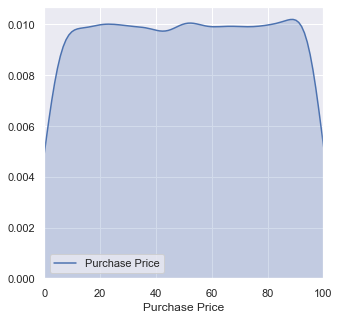

In [183]:
sns.set(rc={'figure.figsize':(5,5)})
g=sns.kdeplot(df["Purchase Price"],shade=True)
plt.xlim(0,100)
plt.xlabel("Purchase Price")
plt.show(g)

In [184]:
for i in range(len(df["Browser Info"])):
    review = re.sub(r'[^a-zA-Z]'," ",df["Browser Info"][i])
    review = review.lower()
    review = nltk.word_tokenize(review)
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    review = ' '.join(review)
    df["Browser Info"][i]= review
for i in range(len(df["Browser Info"])): 
    if "window" in df["Browser Info"][i]:
        df["Browser Info"][i]="window"
    elif "linux" in df["Browser Info"][i]:
        df["Browser Info"][i]="linux"
    else:
        df["Browser Info"][i]="macintosh"

<ipython-input-184-b75cdcfcc0c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Browser Info"][i]= review
<ipython-input-184-b75cdcfcc0c4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Browser Info"][i]="linux"
<ipython-input-184-b75cdcfcc0c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Browser Info"][i]="window"
<ipython-input-184-b75cdcfcc0c4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy 

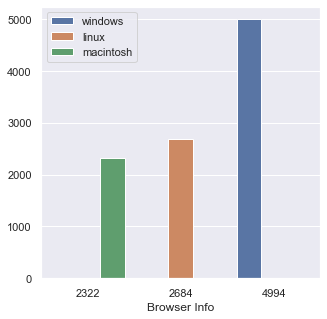

In [185]:
OS=df["Browser Info"].value_counts()
sns.barplot(data=OS,x=OS.index,y=OS.values,hue=["windows","linux","macintosh"])

In [186]:
OS1=df.groupby("Browser Info")["Purchase Price"].sum()

In [187]:
OS1

Browser Info
linux        118080.43
macintosh    131945.32
window       253447.27
Name: Purchase Price, dtype: float64

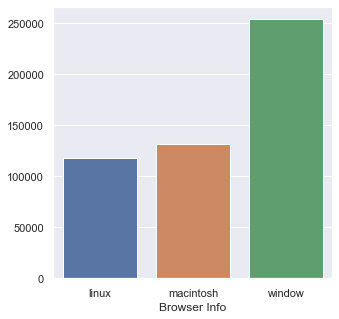

In [188]:
sns.barplot(x=OS1.index,y=OS1.values)

# Sandhya's Code file

In [14]:
df = pd.read_csv("C:/Users/ajaid/E-com.csv")

In [202]:
print(df.describe())

        Credit Card  CC Security Code  Purchase Price
count  1.000000e+04      10000.000000    10000.000000
mean   2.341374e+15        907.217800       50.347302
std    2.256103e+15       1589.693035       29.015836
min    6.040186e+10          0.000000        0.000000
25%    3.056322e+13        280.000000       25.150000
50%    8.699942e+14        548.000000       50.505000
75%    4.492298e+15        816.000000       75.770000
max    6.012000e+15       9993.000000       99.990000


CC Provider
American Express               42865.52
Diners Club / Carte Blanche    37378.39
Discover                       42208.13
JCB 15 digit                   44376.60
JCB 16 digit                   84597.33
Maestro                        42620.78
Mastercard                     40835.10
VISA 13 digit                  39976.54
VISA 16 digit                  85528.86
Voyager                        43085.77
Name: Purchase Price, dtype: float64


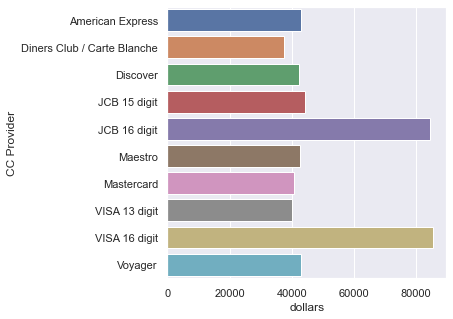

In [203]:
x = df.groupby(by='CC Provider')['Purchase Price'].sum()
print(x)
sns.barplot(x.values,x.index)
plt.xlabel('dollars')
plt.show()

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Address           10000 non-null  object        
 1   Lot               10000 non-null  object        
 2   AM or PM          10000 non-null  object        
 3   Browser Info      10000 non-null  object        
 4   Company           10000 non-null  object        
 5   Credit Card       10000 non-null  int64         
 6   CC Exp Date       10000 non-null  datetime64[ns]
 7   CC Security Code  10000 non-null  int64         
 8   CC Provider       10000 non-null  object        
 9   Email             10000 non-null  object        
 10  Job               10000 non-null  object        
 11  IP Address        10000 non-null  object        
 12  Language          10000 non-null  object        
 13  Purchase Price    10000 non-null  float64       
dtypes: datetime64[ns](1), f

In [205]:
df.isnull().values.any()

False

In [206]:
df.shape

(10000, 14)

In [207]:
x= df[df["Purchase Price"]==0]
x[["CC Provider","Purchase Price"]]

,CC Provider,Purchase Price
2876,VISA 16 digit,0.0
5487,Discover,0.0


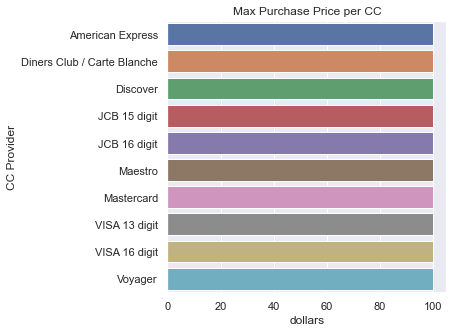

In [208]:
# Max purachse price per CC provider is same at around 99 $
x = df.groupby(by='CC Provider')['Purchase Price'].max()
sns.barplot(x.values,x.index)
plt.xlabel('dollars')
plt.title('Max Purchase Price per CC')
plt.show()

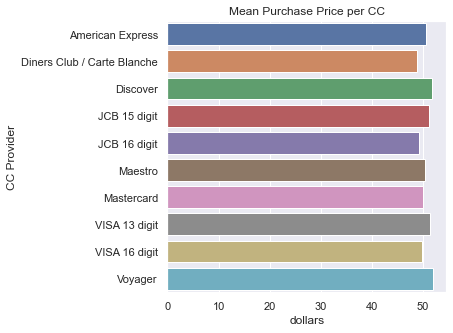

In [209]:
# mean purachse price per CC provider is same at around 50 $
x = df.groupby(by='CC Provider')['Purchase Price'].mean()
sns.barplot(x.values,x.index)
plt.xlabel('dollars')
plt.title('Mean Purchase Price per CC')
plt.show()

CC Provider
American Express               42865.52
Diners Club / Carte Blanche    37378.39
Discover                       42208.13
JCB 15 digit                   44376.60
JCB 16 digit                   84597.33
Maestro                        42620.78
Mastercard                     40835.10
VISA 13 digit                  39976.54
VISA 16 digit                  85528.86
Voyager                        43085.77
Name: Purchase Price, dtype: float64


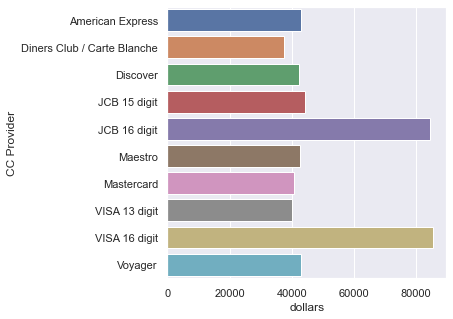

In [210]:
# Highest transaction that is purchase price , clearlr Visa 16 Digit and JCB 16 Digit
# Lowest tansaction found towards Visa 13 digit and Diners Club/Carte Blanche
x = df.groupby(by='CC Provider')['Purchase Price'].sum()
print(x)
sns.barplot(x.values,x.index)
plt.xlabel('dollars')
plt.show()

In [211]:
df.groupby(by='CC Provider')['Purchase Price'].count()

CC Provider
American Express                849
Diners Club / Carte Blanche     767
Discover                        817
JCB 15 digit                    868
JCB 16 digit                   1716
Maestro                         846
Mastercard                      816
VISA 13 digit                   777
VISA 16 digit                  1715
Voyager                         829
Name: Purchase Price, dtype: int64

In [212]:
# Obervation 1, Top 10 Companies that Purchased credit cards
pd.DataFrame(df['Company'].value_counts()[:10])

#x = df['Company'].value_counts()

,Company
Smith Group,15
Brown Ltd,15
Smith PLC,13
Smith LLC,13
Williams LLC,12
Smith and Sons,11
Davis and Sons,11
Johnson LLC,10
Smith Ltd,10
Brown Group,10


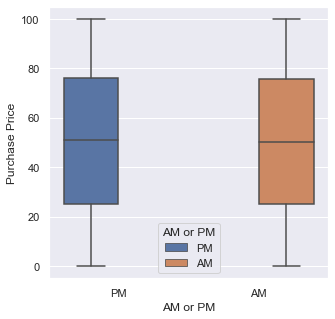

In [213]:
# Observation 2
# Purchase pattern is similar during AM and PM , time of the day along with price distribution
sns.boxplot('AM or PM', y='Purchase Price',data=df, hue='AM or PM')
plt.show()

In [15]:
df['CC Exp Date'].dtypes
#df[df['CC Exp Date'] > sys]

dtype('O')

In [27]:
df_exp=df[df['CC Exp Date'] <= pd.Timestamp.now()]
df_exp_cnt = df_exp.groupby(by='CC Provider')['CC Provider'].count()
df_exp_cnt

CC Provider
American Express               386
Diners Club / Carte Blanche    358
Discover                       367
JCB 15 digit                   378
JCB 16 digit                   722
Maestro                        388
Mastercard                     359
VISA 13 digit                  352
VISA 16 digit                  753
Voyager                        350
Name: CC Provider, dtype: int64

In [28]:
df_exp_cnt

CC Provider
American Express               386
Diners Club / Carte Blanche    358
Discover                       367
JCB 15 digit                   378
JCB 16 digit                   722
Maestro                        388
Mastercard                     359
VISA 13 digit                  352
VISA 16 digit                  753
Voyager                        350
Name: CC Provider, dtype: int64

In [29]:
df_exp_cnt.sum()

4413

CC Provider
American Express               386
Diners Club / Carte Blanche    358
Discover                       367
JCB 15 digit                   378
JCB 16 digit                   722
Maestro                        388
Mastercard                     359
VISA 13 digit                  352
VISA 16 digit                  753
Voyager                        350
Name: CC Provider, dtype: int64


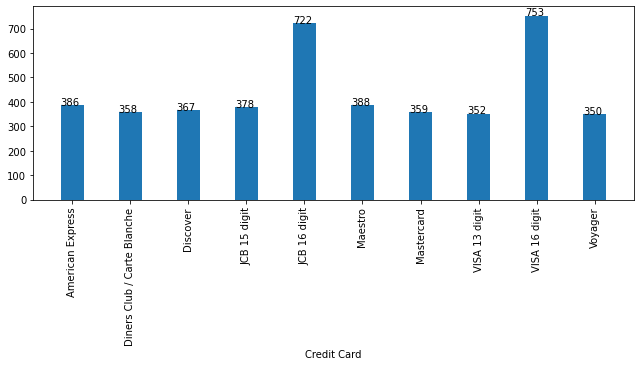

In [26]:
from datetime import datetime
df['CC Exp Date'] =  pd.to_datetime(df['CC Exp Date'],
                              format='%m/%y',exact=False)
df.dtypes

df_exp = df[df['CC Exp Date'] <= pd.Timestamp.now()]

df_exp_cnt = df_exp.groupby(by='CC Provider')['CC Provider'].count()

print(df_exp_cnt)
plt.figure(figsize=(9,5))
bars = plt.bar(df_exp_cnt.index,df_exp_cnt.values,width=0.4) 
#bars = sns.barplot(df_exp_cnt.index,df_exp_cnt.values) 
xlocs, xlabs = plt.xticks()

xlocs=[i for i in df_exp_cnt.index]
xlabs=[i for i in df_exp_cnt.index]
plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Credit Card')
plt.show()


# Nagmani Code

In [40]:
Majorcards = df["CC Provider"].value_counts().head(10)

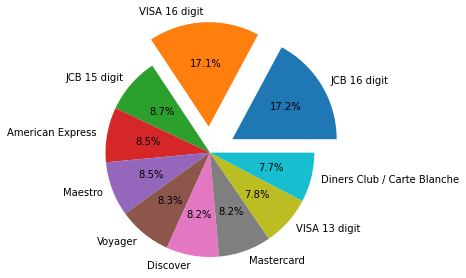

In [41]:
plt.pie(Majorcards, autopct = '%.1f%%', radius = 1.2, labels = Majorcards.index, explode = [0.3,0.3,0,0,0,0,0,0,0,0]);
plt.show()

# Praveena Code

In [30]:
df = pd.read_csv("C:/Users/ajaid/E-com.csv")

*            List of all Retail Bankers using Mozilla browser                *
                                                Address    Lot AM or PM  \
183   0024 Smith Tunnel Suite 760\nPort Leeton, CO 8...  52 Eg       PM   
462      01652 Scott Keys\nSaundersville, UT 01888-8907  82 Tu       PM   
1430  2256 Chelsea Ferry Apt. 626\nNew Jeremyhaven, ...  01 fZ       PM   
2947  960 Thornton Ford Suite 898\nRodriguezbury, MN...  43 VJ       PM   
3890  419 Andrew Mission Suite 602\nEast Nicholas, W...  65 Ev       AM   
5214   92978 Jones Wall Apt. 965\nPort Sharon, WA 21398  80 Na       PM   
5347  37134 Robert Walks Apt. 678\nEast Aaron, ID 42283  17 BE       AM   
6483   679 Susan Squares Apt. 205\nCoreymouth, GA 99384  60 hx       PM   
6520  122 Ruiz Junction Apt. 299\nPort Jessica, MH 6...  78 kc       AM   
8711  201 Gordon Trail Suite 344\nBrownport, ND 1613...  69 aq       AM   
8782        311 Michael Course\nAlexischester, TX 25134  09 ET       PM   
9131    9637 King Mou

*            List of unique Retail Bankers using Mozilla browser             *


AttributeError: 'DataFrame' object has no attribute 'value_counts'

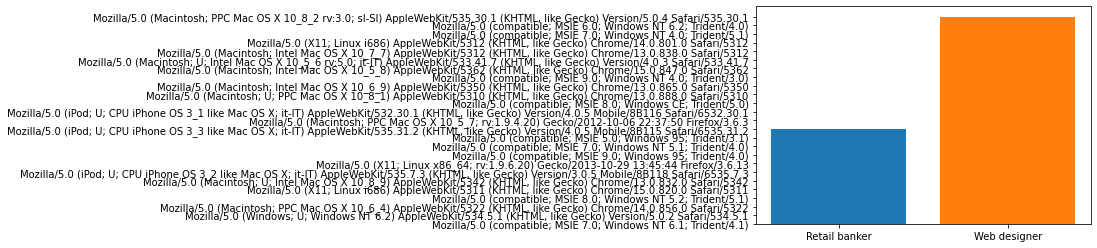

In [31]:
# Filter all Retail Bankers and Web Designers using Mozilla browser 
print('*            List of all Retail Bankers using Mozilla browser                *')
print(df[(df['Browser Info'].str.contains('Mozilla')) & (df['Job']=='Retail banker')])
xt=df[(df['Browser Info'].str.contains('Mozilla')) & (df['Job']=='Retail banker')]
plt.bar(xt["Job"],xt["Browser Info"],label="Retail Bankers")

print('*            List of all Web Designers using Mozilla browser                *')
print(df[(df['Browser Info'].str.contains('Mozilla')) & (df['Job']=='Web designer')])
dt=df[(df['Browser Info'].str.contains('Mozilla')) & (df['Job']=='Web designer')]
plt.bar(dt["Job"],dt["Browser Info"],label="Web designer")

print('*            List of unique Retail Bankers using Mozilla browser             *')
a=df[(df['Browser Info'].str.contains('Mozilla')) & (df['Job']=='Retail banker')].value_counts() # unique rows for the count
print(a)

print('*            Count of unique rows of Retail Bankers using Mozilla browser    *')
b=df[(df['Browser Info'].str.contains('Mozilla')) & (df['Job']=='Retail banker')].count() # actual count
b

In [32]:
#  List of all Credit Cards Providers used by Scientists
print('*                  Credit Cards used by Scientists           *')
s=df.loc[(df['Job'].str.contains('Scientist'))]
print(s[['Job','Credit Card','CC Provider']])

print('*           Credit Cards used by Scientists Sorted            *')
s[['Job','Credit Card','CC Provider']].sort_values(by='CC Provider')

*                  Credit Cards used by Scientists           *
                                                    Job       Credit Card  \
0                Scientist, product/process development  6011929061123406   
28                  Scientist, research (life sciences)   180026477662982   
120              Scientist, product/process development     4290973020590   
143                                   Scientist, marine  5565281591099066   
169                               Scientist, biomedical  6011118388931150   
...                                                 ...               ...   
9563                Scientist, research (life sciences)  4352914341199170   
9610                                  Scientist, marine  5305770826936162   
9618                        Scientist, research (maths)  4259028017700072   
9826  Scientist, clinical (histocompatibility and im...   180099665523670   
9983                Scientist, research (life sciences)   343856674589081   

           C

,Job,Credit Card,CC Provider
427,"Scientist, forensic",6011548071409967,American Express
6091,"Scientist, biomedical",5568904885087268,American Express
3634,"Scientist, audiological",3096201339807847,American Express
8300,"Scientist, biomedical",3158539245891388,American Express
475,"Scientist, research (medical)",372745026103010,American Express
...,...,...,...
2701,"Scientist, research (maths)",379841355400631,Voyager
7956,"Scientist, research (physical sciences)",4272896333596660,Voyager
2504,"Scientist, water quality",340473745625143,Voyager
5170,"Scientist, audiological",5108901006444300,Voyager


In [33]:
# List of all Scientists using the American Express card
ab=df.loc[(df['Job'].str.contains('Scientist')) & (df['CC Provider']=='American Express')]
ab[['Job','CC Provider']]

,Job,CC Provider
427,"Scientist, forensic",American Express
475,"Scientist, research (medical)",American Express
2534,"Scientist, clinical (histocompatibility and im...",American Express
2550,"Scientist, water quality",American Express
3049,"Scientist, research (maths)",American Express
3634,"Scientist, audiological",American Express
3784,"Scientist, research (life sciences)",American Express
5558,"Scientist, biomedical",American Express
5823,"Scientist, clinical (histocompatibility and im...",American Express
6091,"Scientist, biomedical",American Express


In [34]:
# Scientists using all credit cards
sb=df.loc[(df['Job'].str.contains('Scientist'))]

# Count of all Scientists using American Express cards

print('*                    Scientists using Ameircan Express cards         * ')
ars=sb[sb['CC Provider']=='American Express']
print(ars['CC Provider'].value_counts())

# Count of all Scientists using JCB 15 digit cards
print('*                    Scientists using JCB 15 digit cards                      * ')
jrs=sb[sb['CC Provider']=='JCB 16 digit']
print(jrs['CC Provider'].value_counts())

# Count of all Scientists using American Express cards
print('*                    Scientists using VISA cards                     * ')
krs=sb[sb['CC Provider']=='VISA 13 digit']
print(krs['CC Provider'].value_counts())

*                    Scientists using Ameircan Express cards         * 
American Express    14
Name: CC Provider, dtype: int64
*                    Scientists using JCB 15 digit cards                      * 
JCB 16 digit    44
Name: CC Provider, dtype: int64
*                    Scientists using VISA cards                     * 
VISA 13 digit    15
Name: CC Provider, dtype: int64


Voyager                        13
American Express               14
VISA 13 digit                  15
Diners Club / Carte Blanche    16
Discover                       17
Maestro                        18
Mastercard                     18
JCB 15 digit                   21
VISA 16 digit                  40
JCB 16 digit                   44
Name: CC Provider, dtype: int64


No handles with labels found to put in legend.
No handles with labels found to put in legend.


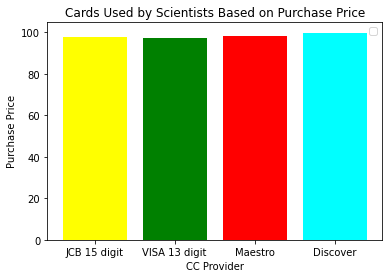

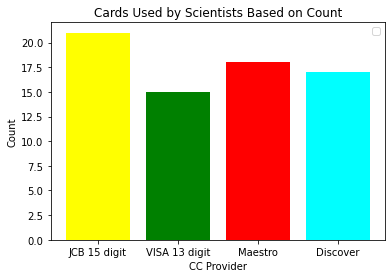

In [35]:
# Cards used by scientists based on purchase price and count of CC Provider
# Count of CC Provider cards used by Scientists
scb=df.loc[(df['Job'].str.contains('Scientist'))]
print(scb['CC Provider'].value_counts().sort_values())

m=scb[scb['CC Provider']=='JCB 15 digit']
n=scb[scb['CC Provider']=='VISA 13 digit']
o=scb[scb['CC Provider']=='Maestro']
p=scb[scb['CC Provider']=='Discover']

plt.figure(1)
plt.bar(m['CC Provider'],m['Purchase Price'],color='yellow')
plt.bar(n['CC Provider'],n['Purchase Price'],color='green')
plt.bar(o['CC Provider'],o['Purchase Price'],color='red')
plt.bar(p['CC Provider'],p['Purchase Price'],color='cyan')
plt.plot()
plt.title("Cards Used by Scientists Based on Purchase Price")
plt.ylabel('Purchase Price')
plt.xlabel('CC Provider')
plt.legend()


plt.figure(2)
plt.bar(m['CC Provider'],m['Purchase Price'].count(),color='yellow')
plt.bar(n['CC Provider'],n['Purchase Price'].count(),color='green')
plt.bar(o['CC Provider'],o['Purchase Price'].count(),color='red')
plt.bar(p['CC Provider'],p['Purchase Price'].count(),color='cyan')

plt.plot()
plt.title("Cards Used by Scientists Based on Count")
plt.ylabel('Count')
plt.xlabel('CC Provider')
plt.legend()

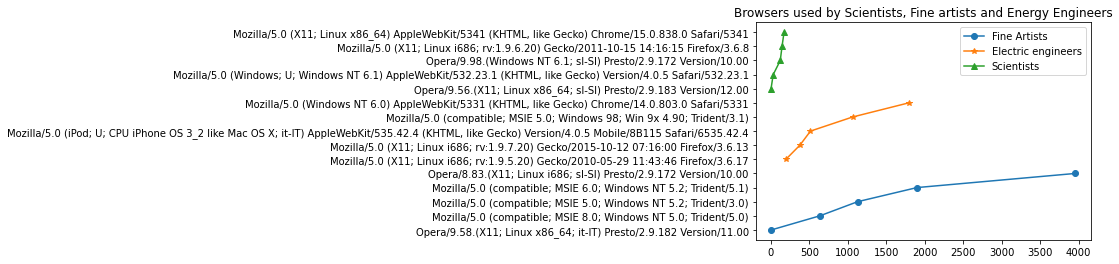

In [36]:
# Browser Info used by Fine artists, Energy engineers and Scientists for top 5 records

ft = df[df["Job"]=='Fine artist'].head()
ft[["Job", "CC Provider", "Company","Browser Info"]]

et= df[df["Job"]=='Energy engineer'].head()
et[["Job", "CC Provider", "Company","Browser Info"]]

st=df.loc[(df['Job'].str.contains('Scientist'))].head()
st[["Job", "CC Provider", "Company","Browser Info"]]

plt.plot(ft[ft["Job"]=="Fine artist"]["Browser Info"],label="Fine Artists",marker="o")
plt.plot(et[et["Job"]=="Energy engineer"]["Browser Info"],label="Electric engineers",marker="*")
plt.plot(st[st["Job"].str.contains("Scientist")]["Browser Info"],label="Scientists",marker="^")
plt.title('Browsers used by Scientists, Fine artists and Energy Engineers') 
plt.legend()

Text(0.5, 1.0, 'Fine artist Purchase Price for Browsers')

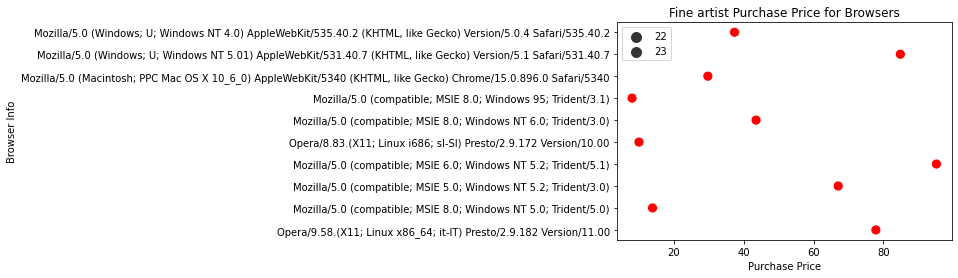

In [39]:
# Top 10 Purchase Price of Browsers by Fine artists
ft = df[df["Job"]=='Fine artist'].head(10)
sns.scatterplot(x=ft["Purchase Price"],y=ft["Browser Info"],size=23,sizes=(100, 200),color='red')
plt.title('Fine artist Purchase Price for Browsers')

                                      Job  Purchase Price
0  Scientist, product/process development           98.14
1                       Drilling engineer           70.73
2                Customer service manager            0.95
3                       Drilling engineer           78.04
4                             Fine artist           77.82
5                       Fish farm manager           25.15
6                                  Dancer           88.56
7                         Event organiser           44.25
8                       Financial manager           59.54
9                      Forensic scientist           95.63


Text(0.5, 0, 'Purchase Price')

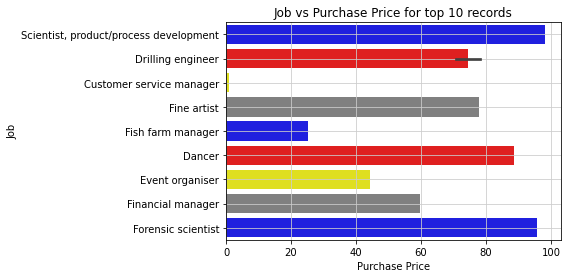

In [38]:
# Job Vs Purchase price for the top 10 rows in the dataset
axt = df[['Job','Purchase Price']].head(10)
print(axt)

ax = sns.barplot(data=axt, x="Purchase Price", y="Job", palette=['blue', 'red', 'yellow', 'grey'])
ax.set_title('Job vs Purchase Price for top 10 records')
ax.grid(color='#cccccc')
ax.set_ylabel('Job')
ax.set_xlabel('Purchase Price')